***Exploratory data analysis (BI)***
\
Notebook as a followup to gulas16/eda.ipynb, where the goal was to look at distributions and more general relationships. Here we look for more audience-friendly conclusions.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from dotenv import load_dotenv

load_dotenv()
import os

In [5]:
# get data
DATA_DIR = './Data/'
FILE = 'spotify_tracks_kaggle_weekly.csv'
# FILE = 'spotify_2023.csv'

In [36]:
data = pd.read_csv(DATA_DIR + FILE, encoding='latin-1')

**previously in eda**


*initial*:
- popularity counts for each score
- mean popularity score for each language
- popularity score by year of release
- count bias for popularity/year
- counts for languages -> second is 'unknown' (null analysis subject?)

*distribution*:
- counts of numeric and categorical attributes
- distribution of all numeric tested against log and sqrt
- outliers for numeric attributes
- correlation analysis
- normality testing -> transformations needed 


***RELEVANT ATTRIBUTES***

In [8]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

Some features that are accessible to a broader audience: 
- time_signature - 3/4 - waltz, 4/4 - common time, most pop songs, 5-6-7/4 - jazzy  (categorical)
- tempo 
- key + mode - C major, A minor, etc (categorical)
- duration_ms 

*time signatures*

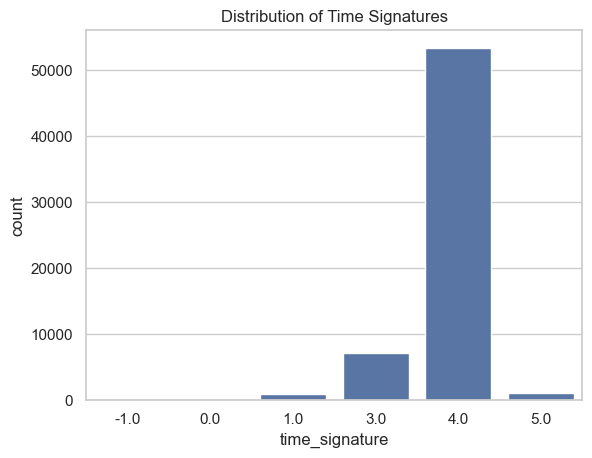

time_signature
 4.0    53332
 3.0     7071
 5.0     1000
 1.0      856
-1.0       35
 0.0       23
Name: count, dtype: int64

In [11]:
sns.countplot(x='time_signature', data=data)
plt.title('Distribution of Time Signatures')
plt.show()
data['time_signature'].value_counts()

the dataset described the column as ranging from 3/4 to 7/4, yet we values -1,0 and 1. (expect values from 3 - 7). 
We can see that the two most common time signatures are 4/4(standard) and 3/4(waltz) which was to be expected.
Since this audio feature is just estimated using some machine learning model and time signatures outside these two are not that common, 
the models dont really have the capacity to categorize them correctly, so there is a possibility to a lot of 4/4 and 3/4 ts are misclassified.

In [16]:
# rows with time signature 0,-1,1
data[(data['time_signature'] == 0)].head()
data[(data['time_signature'] == -1)].head()
# data[(data['time_signature'] == 1)].head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
2317,6srj5VAeLXSSTYcfbNYO8h,Bloom of Happiness,Yuvan Shankar Raja,2023,0,https://i.scdn.co/image/ab67616d0000b2730a7f95...,Sandakozhi (Original Soundtrack),-1.0,-1.0,12011.0,...,-1.0,-1.0,-100000.0,-1.0,-1.0,-1.0,-1.0,-1.0,https://open.spotify.com/track/6srj5VAeLXSSTYc...,Tamil
3625,0GWqdeX620MqCHeFKTRLjw,Closing All Differences,Yuvan Shankar Raja,2004,0,https://i.scdn.co/image/ab67616d0000b2733c51d9...,Manmadhan (Original Background Score),-1.0,-1.0,11360.0,...,-1.0,-1.0,-100000.0,-1.0,-1.0,-1.0,-1.0,-1.0,https://open.spotify.com/track/0GWqdeX620MqCHe...,Tamil
3642,0t8LWf0MZ5YwYyBBNmYM2K,Closing All Differences,Yuvan Shankar Raja,2004,0,https://i.scdn.co/image/ab67616d0000b2737951c3...,Manmadhan (Original Background Score),-1.0,-1.0,11360.0,...,-1.0,-1.0,-100000.0,-1.0,-1.0,-1.0,-1.0,-1.0,https://open.spotify.com/track/0t8LWf0MZ5YwYyB...,Tamil
3754,2uZSJ1cqwIRYMFa5PPE8jc,Sethupathi's Anger,Harris Jayaraj,2023,0,https://i.scdn.co/image/ab67616d0000b27369fcbf...,Arul (Original Soundtrack),-1.0,-1.0,14224.0,...,-1.0,-1.0,-100000.0,-1.0,-1.0,-1.0,-1.0,-1.0,https://open.spotify.com/track/2uZSJ1cqwIRYMFa...,Tamil
18999,6IbxnrriSlN5WvrVjltzVj,Shalini's Advice,Anirudh Ravichander,2020,0,https://i.scdn.co/image/ab67616d0000b2733e816d...,Velaiyilla Pattathari (Original Sound Track),-1.0,-1.0,8733.0,...,-1.0,-1.0,-100000.0,-1.0,-1.0,-1.0,-1.0,-1.0,https://open.spotify.com/track/6IbxnrriSlN5Wvr...,Tamil


Entries with 0,-1 or 1 time signature have either extremely low popularity and other scores or completely invalid values (negative values for acousticness, danceability etc)

*tempo*

C:\Users\Róbert\AppData\Local\Temp\ipykernel_2360\2593724919.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tempo'])


<Axes: xlabel='tempo', ylabel='Density'>

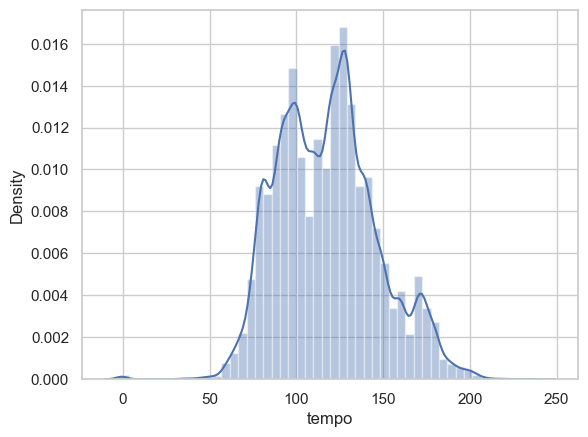

In [17]:
# plot tempo distribution
sns.distplot(data['tempo'])

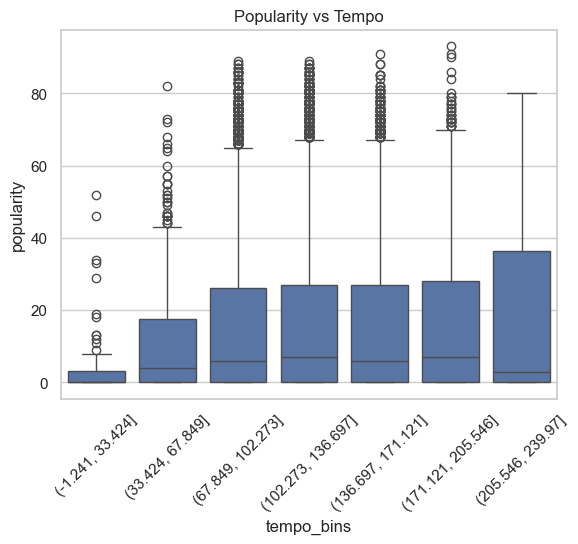

In [21]:
data['tempo_bins'] = pd.cut(data['tempo'], bins=7) 

# Create a box plot
sns.boxplot(x='tempo_bins', y='popularity', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Popularity vs Tempo')
plt.show()


In [22]:
# correlation tempo and popularity
data[['tempo', 'popularity']].corr()



,tempo,popularity
tempo,1.000000,0.028823
popularity,0.028823,1.000000


Not much. We could consider splitting data into 'popular' and 'unpopular' beyond say, 70.

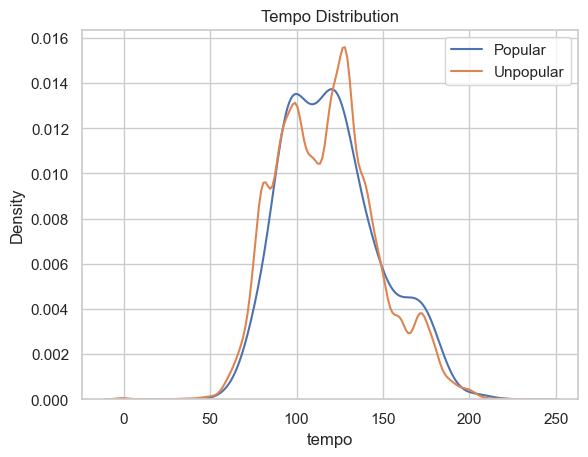

,tempo,popularity
tempo,1.000000,0.004935
popularity,0.004935,1.000000


In [55]:
# split data into popular and unpopular
popular = data[data['popularity'] > 70]
unpopular = data[data['popularity'] < 30]

correlation_popular = popular[['tempo', 'popularity']].corr()
correlation_unpopular = unpopular[['tempo', 'popularity']].corr()

# copare
sns.kdeplot(popular['tempo'], label='Popular')
sns.kdeplot(unpopular['tempo'], label='Unpopular')
plt.legend()
plt.title('Tempo Distribution')
plt.show()

correlation_popular
# correlation_unpopular



Damn,

*key + mode*

<Axes: xlabel='key', ylabel='count'>

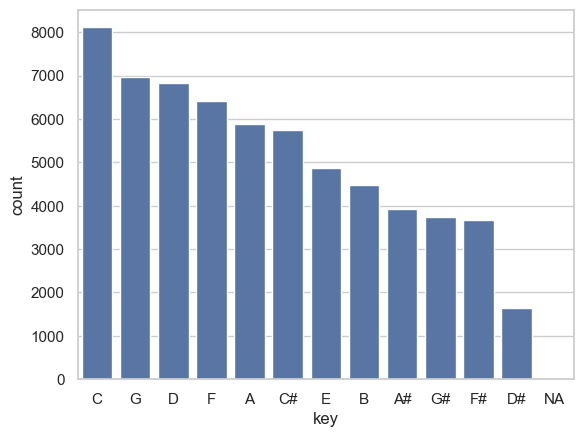

In [44]:
copy_data = data.copy()
# change key from -1 to 11 to nan, C, c# etc
copy_data['key'] = copy_data['key'].replace(-1, 'NA')
copy_data['key'] = copy_data['key'].replace(0, 'C')
copy_data['key'] = copy_data['key'].replace(1, 'C#')
copy_data['key'] = copy_data['key'].replace(2, 'D')
copy_data['key'] = copy_data['key'].replace(3, 'D#')
copy_data['key'] = copy_data['key'].replace(4, 'E')
copy_data['key'] = copy_data['key'].replace(5, 'F')
copy_data['key'] = copy_data['key'].replace(6, 'F#')
copy_data['key'] = copy_data['key'].replace(7, 'G')
copy_data['key'] = copy_data['key'].replace(8, 'G#')
copy_data['key'] = copy_data['key'].replace(9, 'A')
copy_data['key'] = copy_data['key'].replace(10, 'A#')
copy_data['key'] = copy_data['key'].replace(11, 'B')

# plot key distribution
copy_data.sort_values('key', inplace=True)
# sns.countplot(x='key', data=copy_data)
sns.countplot(x='key', data=copy_data, order=copy_data['key'].value_counts().index)







([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'C Major'),
  Text(1, 0, 'G Major'),
  Text(2, 0, 'D Major'),
  Text(3, 0, 'C# Major'),
  Text(4, 0, 'F Minor'),
  Text(5, 0, 'A Major'),
  Text(6, 0, 'F Major'),
  Text(7, 0, 'B Minor'),
  Text(8, 0, 'A Minor'),
  Text(9, 0, 'G# Major'),
  Text(10, 0, 'E Minor'),
  Text(11, 0, 'C Minor'),
  Text(12, 0, 'A# Minor'),
  Text(13, 0, 'E Major'),
  Text(14, 0, 'F# Minor'),
  Text(15, 0, 'D Minor'),
  Text(16, 0, 'G Minor'),
  Text(17, 0, 'F# Major'),
  Text(18, 0, 'C# Minor'),
  Text(19, 0, 'A# Major'),
  Text(20, 0, 'B Major'),
  Text(21, 0, 'G# Minor'),
  Text(22, 0, 'D# Major'),
  Text(23, 0, 'D# Minor'),
  Text(24, 0, 'NA NA')])

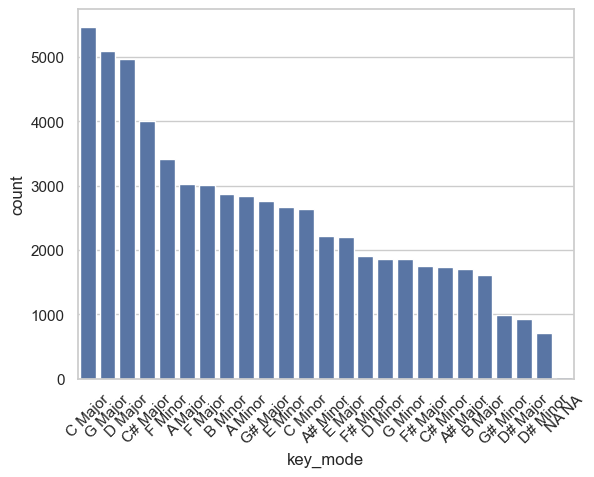

In [ ]:
# combine key and mode column

# replace mode numbers with major and minor
copy_data['mode'] = copy_data['mode'].replace(-1, 'NA')
copy_data['mode'] = copy_data['mode'].replace(0, 'Minor')
copy_data['mode'] = copy_data['mode'].replace(1, 'Major')

copy_data['key_mode'] = copy_data['key'] + ' ' + copy_data['mode']

# plot key_mode distribution
copy_data.sort_values('key_mode', inplace=True)
sns.countplot(x='key_mode', data=copy_data, order=copy_data['key_mode'].value_counts().index)
plt.xticks(rotation=45)

okay cool cool

*duration_ms*

<Axes: xlabel='duration_min', ylabel='Density'>

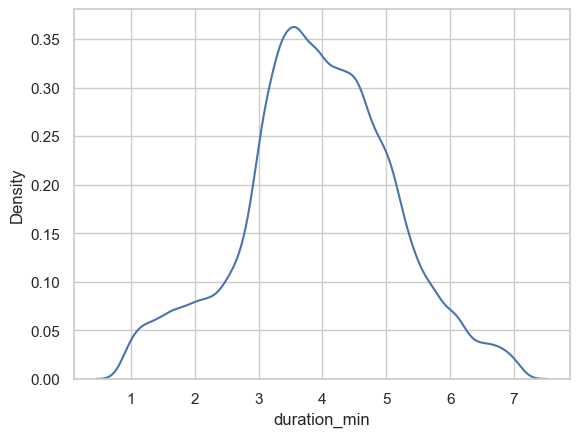

In [53]:
data['duration_ms'].describe()
# convert duration to minutes
data['duration_min'] = data['duration_ms'] / 60000
# find tresholds for outliers
Q1 = data['duration_min'].quantile(0.25)
Q3 = data['duration_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
data = data[(data['duration_min'] > lower_bound) & (data['duration_min'] < upper_bound)]

# plot duration distribution
sns.kdeplot(data['duration_min'])


In [54]:
# correlation with popularity
data[['duration_min', 'popularity']].corr()


,duration_min,popularity
duration_min,1.00000,-0.03648
popularity,-0.03648,1.00000


ok not insignificant

*conclusions*